In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def calculate_ndvi(image_path, nir_band_number,red_band_number):
    with rasterio.open(image_path) as src:
        band_red = src.read(red_band_number)  
        band_nir = src.read(nir_band_number)  
        # 处理异常值
        band_red[band_red>100] = np.median(band_red)
        band_nir[band_nir>100] = np.median(band_nir)
        # 计算NDVI
        ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)
        
        # 处理除以零的情况
        ndvi[np.isnan(ndvi)] = 0

        return ndvi



In [4]:
# 源TIF路径
image_path = r"F:\cache_data\tif_file_sentinel\ky\ky_bands14.tif"
# 使用下载的Sentinel-2图像
ndvi = calculate_ndvi(image_path,8,4)


In [5]:
# 存储路径
out_path = r"F:\cache_data\tif_file_texture\ky\one_bands\ndvi.tif"
# 保存NDVI为TIF文件
with rasterio.open(image_path) as src:
    with rasterio.open(
        out_path,
        'w',
        driver='GTiff',
        height=ndvi.shape[0],
        width=ndvi.shape[1],
        count=1,
        dtype=ndvi.dtype,
        crs=src.crs,
        transform=src.transform
    ) as dst:
        dst.write(ndvi, 1)

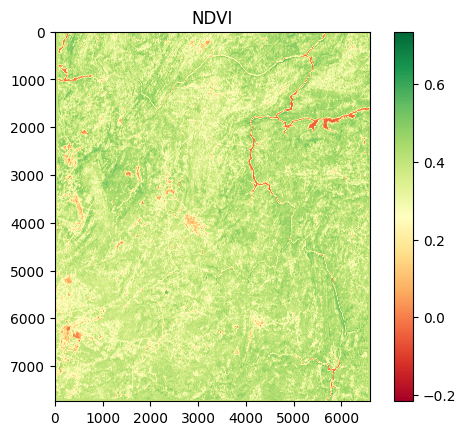

In [6]:
# 可视化NDVI
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI')
plt.show()